# 数据重塑透视

数据自身变换涉及数据分组、维度变化、数据透视、数据重塑、数据转置、归一化等一系列操作。

数据重塑是数据的表达从一个逻辑转变为另一个逻辑，透视则是非常常用的数据重塑手段


## 数据透视

数据透视的作用如下图所示

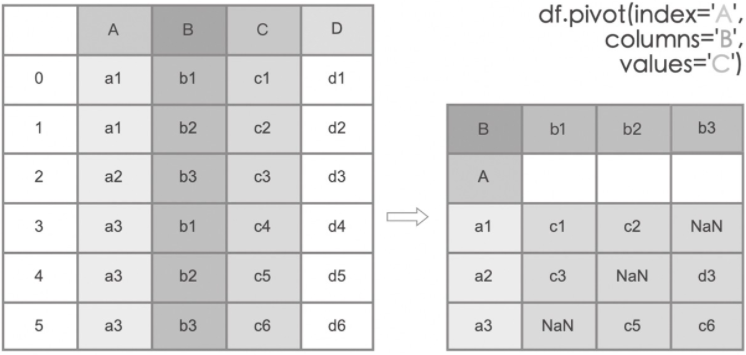

```python
df.pivot(index=None, columns=None, values=None) -> 'DataFrame'
•index：作为新DataFrame的索引，取分组去重的值；如果不传入，则取现有索引。
•columns：作为新DataFrame的列，取去重的值，当列和索引的组合有多个值时会报错，需要使用pd.pivot_table()进行操作。
•values：作为新DataFrame的值，如果指定多个，会形成多层索引；如果不指定，会默认为所有剩余的列
```

In [3]:
# 构造数据
df = pd.DataFrame({
    'A':['a1', 'a1', 'a2', 'a2', 'a3', 'a3'],
    'B':['b1', 'b2', 'b3', 'b1', 'b2', 'b3'],
    'C':['c1', 'c2', 'c3', 'c4', 'c5', 'c6'],
    'D':['d1', 'd2', 'd3', 'd4', 'd5', 'd6'],
})

In [4]:
df.pivot(index='A',columns='B',values='C')

B,b1,b2,b3
A,,,
a1,c1,c2,NaN
a2,c4,NaN,c3
a3,NaN,c5,c6


In [6]:
df.pivot(index='A',columns='B')
# df.pivot(index='A',columns='B',values=['C','D'])

C              D          
B    b1   b2   b3   b1   b2   b3
A                               
a1   c1   c2  NaN   d1   d2  NaN
a2   c4  NaN   c3   d4  NaN   d3
a3  NaN   c5   c6  NaN   d5   d6

### 聚合透视

df.pivot() 只是对原数据的结构、显示形式做了变换，实际业务中往往需要在数据透视过程中对值进行计算，这时候就要用到 df.pivot_table(),作用效果如下

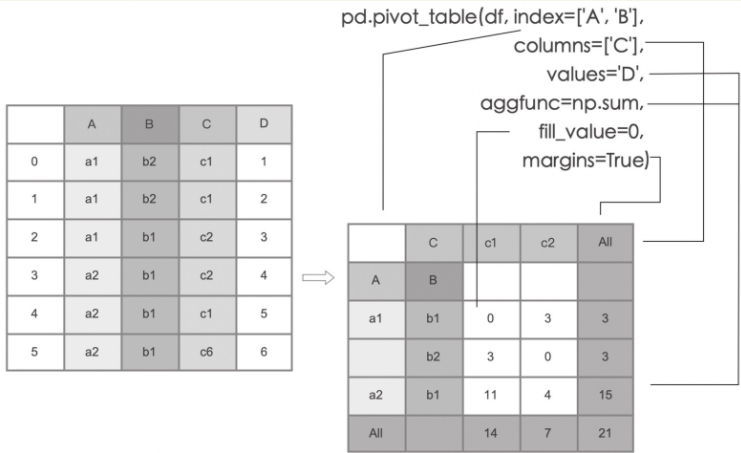

```python
pd.pivot_table(
    data: 'DataFrame',
    values=None,
    index=None,
    columns=None,
    aggfunc: 'AggFuncType' = 'mean',
    fill_value=None,
    margins=False,
    dropna=True,
    margins_name='All',
    observed=False,
    sort=True,
) -> 'DataFrame'
pd.pivot_table()有以下几个关键参数。
•data：要透视的DataFrame对象。
•index：在数据透视表索引上进行分组的列。
•columns：在数据透视表列上进行分组的列。
•values：要聚合的一列或多列。
•aggfunc：用于聚合的函数，默认是平均数mean。
•fill_value：透视会以空值填充值。
•margins：是否增加汇总行列。
```

In [8]:
df = pd.DataFrame({
    'A':['a1', 'a1', 'a1', 'a2', 'a2', 'a2'],
    'B':['b2', 'b2', 'b1', 'b1', 'b1', 'b1'],
    'C':['c1', 'c1', 'c2', 'c2', 'c1', 'c1'],
    'D':[1, 2, 3, 4, 5, 6]
})
df

,A,B,C,D
0,a1,b2,c1,1
1,a1,b2,c1,2
2,a1,b1,c2,3
3,a2,b1,c2,4
4,a2,b1,c1,5
5,a2,b1,c1,6


In [9]:
# 直接用 df.pivot(index='A',columns='B',values='C')会报错  因为 a2 b1 有重复值
df.pivot(index='A',columns='B',values='C')

ValueError: Index contains duplicate entries, cannot reshape

因此我们可以将这些重复的数据按照 func 计算出来

In [10]:
# pivot_table默认算法是取平均值，选择 D 列是因为它是数值数据
pd.pivot_table(df,index='A',columns='B',values='D')

B,b1,b2
A,,
a1,3.0,1.5
a2,5.0,NaN


In [14]:
df = pd.DataFrame({
    'A':['a1', 'a1', 'a1', 'a2', 'a2', 'a2'],
    'B':['b2', 'b2', 'b1', 'b1', 'b1', 'b1'],
    'C':['c1', 'c1', 'c2', 'c2', 'c1', 'c1'],
    'D':[1, 2, 3, 4, 5, 6],
    'E':[9, 8, 7, 6, 5, 4]
})
df

,A,B,C,D,E
0,a1,b2,c1,1,9
1,a1,b2,c1,2,8
2,a1,b1,c2,3,7
3,a2,b1,c2,4,6
4,a2,b1,c1,5,5
5,a2,b1,c1,6,4


In [15]:
# 高级聚合
pd.pivot_table(df, index=['A', 'B'], # 指定多个索引
               columns=['C'], # 指定列
               values='D', # 指定数据值
               aggfunc=[np.sum,np.mean], # 指定聚合方法为求和
               fill_value=0, # 将聚合为空的值填充为0
               margins=True # 增加行列汇总
              )

sum        mean          
C       c1 c2 All   c1   c2  All
A   B                           
a1  b1   0  3   3  0.0  3.0  3.0
    b2   3  0   3  1.5  0.0  1.5
a2  b1  11  4  15  5.5  4.0  5.0
All     14  7  21  3.5  3.5  3.5

In [17]:
# 为各列分别指定计算方法
pd.pivot_table(df, index=['A', 'B'],
               columns=['C'],
               aggfunc={'D':np.mean,'E':np.sum}
              )

D          E     
C       c1   c2    c1   c2
A  B                      
a1 b1  NaN  3.0   NaN  7.0
   b2  1.5  NaN  17.0  NaN
a2 b1  5.5  4.0   9.0  6.0

## 数据堆叠

数据的堆叠和解堆分别用来解决数据的展开和收缩问题。堆叠让数据变成一维数据，可以让我们从不同维度来观察和使用数据。解堆和堆叠互为相反操作。

数据堆叠效果如图：

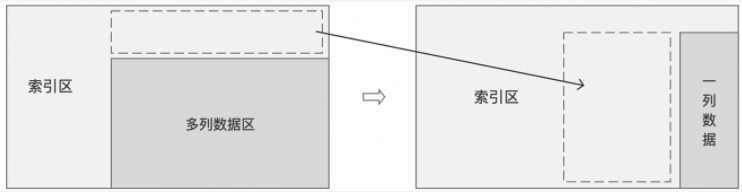

数据堆叠

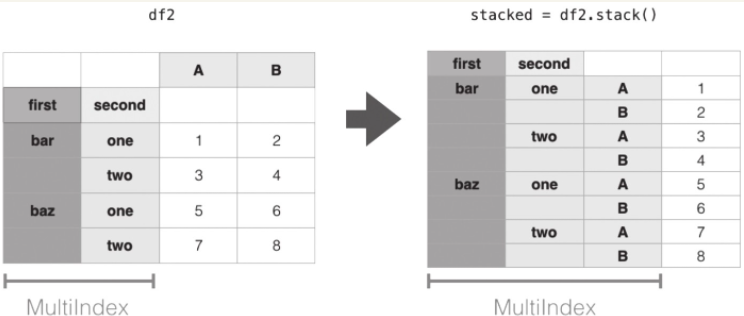

数据解堆
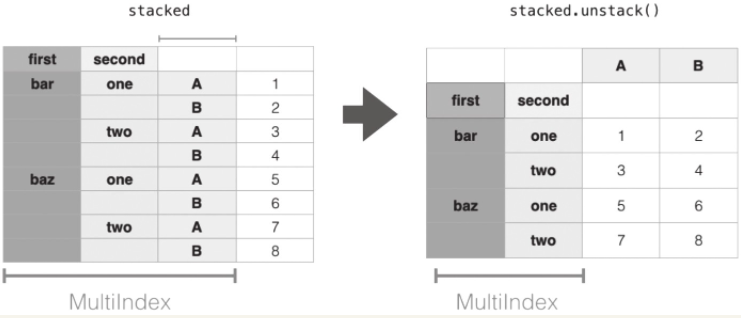

In [19]:
df = pd.DataFrame({
    'A':['a1', 'a1', 'a2', 'a2'],
    'B':['b1', 'b2', 'b1', 'b2'],
    'C':[1, 2, 3, 4],
    'D':[5, 6, 7, 8],
    'E':[5, 6, 7, 8]
})

# 设置多层索引
df.set_index(['A', 'B'], inplace=True)

df

C  D  E
A  B          
a1 b1  1  5  5
   b2  2  6  6
a2 b1  3  7  7
   b2  4  8  8

In [20]:
s=df.stack()
s

A   B    
a1  b1  C    1
        D    5
        E    5
    b2  C    2
        D    6
        E    6
a2  b1  C    3
        D    7
        E    7
    b2  C    4
        D    8
        E    8
dtype: int64

In [21]:
type(s)

pandas.core.series.Series

In [22]:
s.unstack()

C  D  E
A  B          
a1 b1  1  5  5
   b2  2  6  6
a2 b1  3  7  7
   b2  4  8  8

## 交叉表

```PYTHON
pd.crosstab(
    index,
    columns,
    values=None,
    rownames=None,
    colnames=None,
    aggfunc=None,
    margins=False,
    margins_name: 'str' = 'All',
    dropna: 'bool' = True,
    normalize=False,
) -> 'DataFrame'

参数说明如下。
•index：传入列，如df['A']，作为新数据的索引。
•columns：传入列，作为新数据的列，新数据的列为此列的去重值。
•values：可选，传入列，根据此列的数值进行计算，计算方法取aggfunc参数指定的方法，此时aggfunc为必传。
•aggfunc：函数，values列计算使用的计算方法。
•rownames：新数据和行名，一个序列，默认值为None，必须与传递的行数、组数匹配。
•colnames：新数据和列名，一个序列，默认值为None；如果传递，则必须与传递的列数、组数匹配。
•margins：布尔值，默认值为False，添加行/列边距（小计）。
•normalize：布尔值，{'all'，'index'，'columns'}或{0,1}，默认值为False。通过将所有值除以值的总和进行归一化
```

交叉表也是一种透视表，不是value是元素的数量

交叉表可以帮助我们了解标签数据的构成情况。

In [24]:
# 原数据
df = pd.DataFrame({
    'A':['a1', 'a1', 'a2', 'a2', 'a1'],
    'B':['b2', 'b1', 'b2', 'b2', 'b1'],
    'C':[1, 2, 3, 4, 5]
})
df

,A,B,C
0,a1,b2,1
1,a1,b1,2
2,a2,b2,3
3,a2,b2,4
4,a1,b1,5


In [25]:
pd.crosstab(df['A'],df['B'])

B,b1,b2
A,,
a1,2,1
a2,0,2


### 归一化

normalize 参数可以帮助我们实现交叉表数据归一化，算法为对应值除以所有值的和，方便我们观察此位置上数据在全体中的比重

In [26]:
pd.crosstab(df['A'], df['B'])

B,b1,b2
A,,
a1,2,1
a2,0,2


In [27]:
pd.crosstab(df['A'], df['B'],normalize=True)
# a1 b1 2/(2+1+0+2)=0.4

B,b1,b2
A,,
a1,0.4,0.2
a2,0.0,0.4


In [28]:
# 按列进行归一化
pd.crosstab(df['A'], df['B'], normalize='columns')
# a1 b2 1/(1+2)=0.3333

B,b1,b2
A,,
a1,1.0,0.333333
a2,0.0,0.666667


### 指定聚合方法

In [29]:
df

,A,B,C
0,a1,b2,1
1,a1,b1,2
2,a2,b2,3
3,a2,b2,4
4,a1,b1,5


In [33]:
pd.crosstab(df['A'],df['B'],values=df['C'],aggfunc=np.sum)
# pd.crosstab(df['A'],df['B'],values=df['C'],aggfunc=[np.sum,np.mean])

B,b1,b2
A,,
a1,7.0,1.0
a2,NaN,7.0


### 汇总

In [34]:
# margins=True可以增加行和列的汇总，按照行列方向对数据求和
# margins_name='total'可以定义这个汇总行和列的名称
pd.crosstab(df['A'],df['B'],values=df['C'],aggfunc=np.sum,margins=True,margins_name='total')

B,b1,b2,total
A,,,
a1,7.0,1.0,8
a2,NaN,7.0,7
total,7.0,8.0,15


## 数据转置

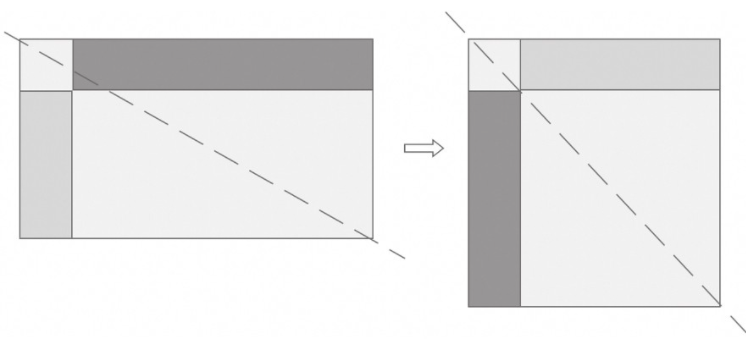

df.T属性是df.transpose()方法的简写形式

Serise 也可进行转置，不过转置后也是它自身，没有变化

In [37]:
df = pd.DataFrame({
    'A':['a1', 'a2', 'a3', 'a4', 'a5'],
    'B':['b1', 'b2', 'b3', 'b4', 'b5'],
    'C':[1, 2, 3, 4, 5],
})
df

,A,B,C
0,a1,b1,1
1,a2,b2,2
2,a3,b3,3
3,a4,b4,4
4,a5,b5,5


In [38]:
df.T

,0,1,2,3,4
A,a1,a2,a3,a4,a5
B,b1,b2,b3,b4,b5
C,1,2,3,4,5


转置之后类型会发生变化，这是因为数据结构发生了巨大变化，pandas 会重新自动确认数据类型

In [40]:
df.dtypes

A    object
B    object
C     int64
dtype: object

In [41]:
df.T.dtypes

0    object
1    object
2    object
3    object
4    object
dtype: object

### 轴转换

In [ ]:
df.swapaxes("index", "columns") # 行列交换，相当于df.T
df.swapaxes("columns", "index") # 同上
df.swapaxes("index", "columns", copy=True) # 使生效
df.swapaxes("columns", "columns") # 无变化
df.swapaxes("index", "index") # 无变化

## 数据融合

df.melt()是df.pivot()的逆向操作

是将指定列铺开，放到行上名为variable(可指定)、值为value(可指定)

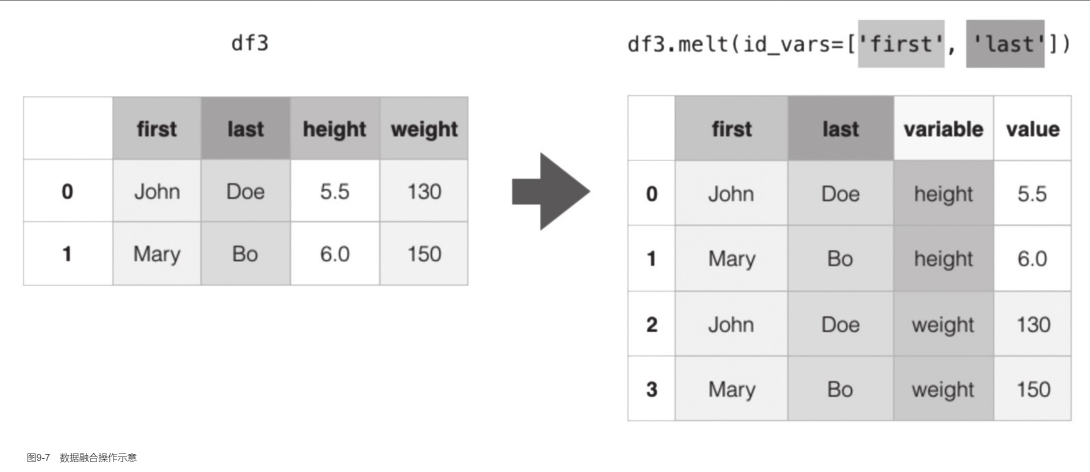

```python
pd.melt(
    frame: 'DataFrame',
    id_vars=None,
    value_vars=None,
    var_name=None,
    value_name='value',
    col_level=None,
    ignore_index: 'bool' = True,
) -> 'DataFrame'

其中的参数说明如下。
•id_vars：tuple、list或ndarray（可选），用作标识变量的列。
•value_vars：tuple、list或ndarray（可选），要取消透视的列。如果未指定，则使用未设置为id_vars的所有列。
•var_name：scalar，用于“变量”列的名称。如果为None，则使用frame.columns.name或“variable”。
•value_name：scalar，默认为“value”，用于“value”列的名称。
•col_level：int或str（可选），如果列是多层索引，则使用此级别来融合。

对于原始数据是多层索引的，可以使用col_level=0参数指定融合时的层级
```

In [3]:
# 原数据
df = pd.DataFrame({
    'A':['a1', 'a2', 'a3', 'a4', 'a5'],
    'B':['b1', 'b2', 'b3', 'b4', 'b5'],
    'C':[1, 2, 3, 4, 5],
})
df

,A,B,C
0,a1,b1,1
1,a2,b2,2
2,a3,b3,3
3,a4,b4,4
4,a5,b5,5


In [4]:
# 默认融合所有列
pd.melt(df)

,variable,value
0,A,a1
1,A,a2
2,A,a3
3,A,a4
4,A,a5
5,B,b1
6,B,b2
7,B,b3
8,B,b4
9,B,b5


In [5]:
# 保留列
pd.melt(df,id_vars=['A','B'])

,A,B,variable,value
0,a1,b1,C,1
1,a2,b2,C,2
2,a3,b3,C,3
3,a4,b4,C,4
4,a5,b5,C,5


In [7]:
# 指定融合列，其余列被省略
pd.melt(df,value_vars=['B','C'])

,variable,value
0,B,b1
1,B,b2
2,B,b3
3,B,b4
4,B,b5
5,C,1
6,C,2
7,C,3
8,C,4
9,C,5


In [8]:
# id_vars 指定保留的列
# value_vars 指定融合的列，其他列如未指定保留会被省略
# var_name 
# value_name
pd.melt(df,id_vars=['A'],value_vars=['B','C'],var_name='BC_label',value_name='BC_value')

,A,BC_label,BC_value
0,a1,B,b1
1,a2,B,b2
2,a3,B,b3
3,a4,B,b4
4,a5,B,b5
5,a1,C,1
6,a2,C,2
7,a3,C,3
8,a4,C,4
9,a5,C,5


## 虚拟变量

虚拟变量也称虚设变量、名义变量、哑变量

常用于 one-hot 特征提取

In [9]:
# 原数据
df = pd.DataFrame({'a': list('adcb'),
                   'b': list('fehg'),
                   'a1': range(4),
                   'b1': range(4,8)})

df

,a,b,a1,b1
0,a,f,0,4
1,d,e,1,5
2,c,h,2,6
3,b,g,3,7


In [11]:
pd.get_dummies(df.a)
# pd.get_dummies(df,columns=['a'])

,a,b,c,d
0,1,0,0,0
1,0,0,0,1
2,0,0,1,0
3,0,1,0,0


In [14]:
pd.get_dummies(df.a1)

,0,1,2,3
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1


In [13]:
# 对比区别
pd.get_dummies(df.a1,prefix='a1')

,a1_0,a1_1,a1_2,a1_3
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1


In [15]:
# 对 dataframe 使用虚拟变量，会将所有非数字虚拟化，数字列不变
pd.get_dummies(df)

,a1,b1,a_a,a_b,a_c,a_d,b_e,b_f,b_g,b_h
0,0,4,1,0,0,0,0,1,0,0
1,1,5,0,0,0,1,1,0,0,0
2,2,6,0,0,1,0,0,0,0,1
3,3,7,0,1,0,0,0,0,1,0


## 因子化

因子化方法 pd.factorize() 做了两件事：
1.对数据进行数字编码
2.对数据进行去重

In [16]:
data = ['b', 'b', 'a', 'c', 'b']
# 因子化
# codes和uniques是我们定义的变量名，强烈推荐大家这么命名，这样代码会变得容易理解
codes, uniques = pd.factorize(data)

In [17]:
codes

array([0, 0, 1, 2, 0], dtype=int64)

In [18]:
uniques

array(['b', 'a', 'c'], dtype=object)

**sort**

In [23]:
# sort=True 对 unique 唯一值进行排序
codes, uniques = pd.factorize(data,sort=True)
codes

array([1, 1, 0, 2, 1], dtype=int64)

In [24]:
uniques
3

array(['a', 'b', 'c'], dtype=object)

**Series**

In [19]:
# 对 Series 操作后，唯一值将生成 Index 对象
cat = pd.Series(['a', 'a', 'c'])
codes,uniques=pd.factorize(cat)

In [20]:
codes

array([0, 0, 1], dtype=int64)

In [21]:
uniques

Index(['a', 'c'], dtype='object')

**缺失值**

In [25]:
codes,uniques=pd.factorize(['b',None,'a','c','b'])
codes

array([ 0, -1,  1,  2,  0], dtype=int64)

In [26]:
uniques

array(['b', 'a', 'c'], dtype=object)

**Pandas 的枚举类型**

Pandas 的枚举类型（Categorical）也可用此方法

In [31]:
cat=pd.Categorical(['a','a','c'],categories=['a','b','c'])
codes,uniques=pd.factorize(cat)
codes

array([0, 0, 1], dtype=int64)

In [32]:
uniques

['a', 'c']
Categories (3, object): ['a', 'b', 'c']

## 爆照列表

爆炸列表非常形象，像一颗炸弹，把列表打散

In [33]:
s=pd.Series([[1,2,3],'foo',[],[3,4]])
s

0    [1, 2, 3]
1          foo
2           []
3       [3, 4]
dtype: object

In [34]:
s.explode()

0      1
0      2
0      3
1    foo
2    NaN
3      3
3      4
dtype: object

每行列表的每个元素都独自占用一行，**索引保持不变，空列表边 NAN**

**Dataframe 的爆炸**

In [36]:
df=pd.DataFrame({'A':[[1,2,3],'foo',[],[3,4]],'B':range(4)})
df

,A,B
0,"[1, 2, 3]",0
1,foo,1
2,[],2
3,"[3, 4]",3


dataframe 可以对列进行爆炸，其他列的值保持不变

In [37]:
# 爆炸一列
df.explode('A')

,A,B
0,1,0
0,2,0
0,3,0
1,foo,1
2,NaN,2
3,3,3
3,4,3


**非列表格式**

对于不是列表但具有列表特质的数据，也可在处理后进行爆炸

In [39]:
df=pd.DataFrame([{'var1':'a,b,c','var2':1},
                {'var1':'d,e,f','var2':2}])
df

,var1,var2
0,"a,b,c",1
1,"d,e,f",2


var1 虽然逗号隔开，但不是列表，我们可以将其先处理成列表，在进行爆炸

In [40]:
df.assign(var1=df.var1.str.split(',')).explode('var1')

,var1,var2
0,a,1
0,b,1
0,c,1
1,d,2
1,e,2
1,f,2
